## Feedforward Neural Network

1. Implement two layer Feed Forward Neural Network for XOR Logic Gate with 2-bit Binary 
Input using Sigmoid activation. Verify the number of learnable parameters in the model

In [57]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

In [58]:
loss_list= []
torch.manual_seed(42)
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32)
Y = torch.tensor([0,1,1,0], dtype=torch.float32)

In [59]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2,2, bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2,1, bias=True)
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x

In [60]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [61]:
dataset = MyDataset(X, Y)
batch_size = 1
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.03)
print(model)

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


In [62]:
def train_one_epoch(idx):
    totalloss = 0.0
    for i, data in enumerate(data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        y_p = model(inputs)
        loss = loss_fn(y_p.flatten(), labels)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss/(len(data_loader)*batch_size)

In [63]:
loss_list = []
for epoch in range(10000):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch % 1000 == 0:
        print('epoch: {}, loss: {}'.format(epoch, avg_loss))

epoch: 0, loss: 0.301132844761014
epoch: 1000, loss: 0.27038103714585304
epoch: 2000, loss: 0.27022553235292435
epoch: 3000, loss: 0.26847536861896515
epoch: 4000, loss: 0.26516810059547424
epoch: 5000, loss: 0.22409719042479992
epoch: 6000, loss: 0.00014028621899342397
epoch: 7000, loss: 1.2327916465437738e-11
epoch: 8000, loss: 3.0242475190789264e-12
epoch: 9000, loss: 2.970956813896919e-12


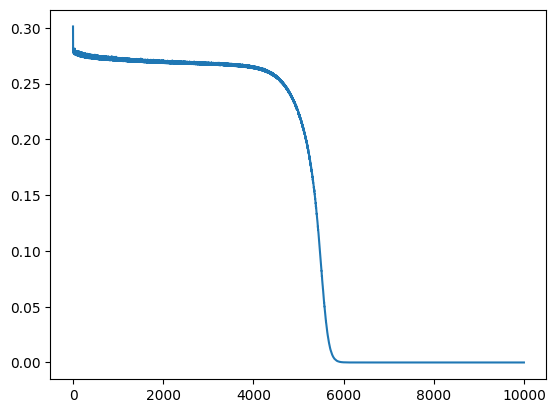

In [64]:
plt.plot(loss_list)
plt.show()

In [65]:
input = torch.tensor([1.,0.])
model.eval()
print("Input = ",input)
print("Output = ",model(input))

input = torch.tensor([0.,0.])
model.eval()
print("Input = ",input)
print("Output = ",model(input))

Input =  tensor([1., 0.])
Output =  tensor([1.0000], grad_fn=<ViewBackward0>)
Input =  tensor([0., 0.])
Output =  tensor([7.1526e-07], grad_fn=<ViewBackward0>)


In [66]:
for param in model.named_parameters():
    print(param)

('linear1.weight', Parameter containing:
tensor([[-1.9767,  2.0750],
        [-3.0809,  3.3435]], requires_grad=True))
('linear1.bias', Parameter containing:
tensor([ 0.7012, -2.5002], requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-2.6653,  2.7713]], requires_grad=True))
('linear2.bias', Parameter containing:
tensor([1.5715], requires_grad=True))


2. Repeat Qn 1 by modifying the activation function to ReLU.

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)
epoch: 0, loss: 0.28828215412795544
epoch: 1000, loss: 0.13222978546400554
epoch: 2000, loss: 0.13277034627981266
epoch: 3000, loss: 0.13273568680347125
epoch: 4000, loss: 0.13273096554848962
epoch: 5000, loss: 0.1327835510719524
epoch: 6000, loss: 0.1328371121908276
epoch: 7000, loss: 0.13272638581878482
epoch: 8000, loss: 0.13273535281267357
epoch: 9000, loss: 0.1324844262948659


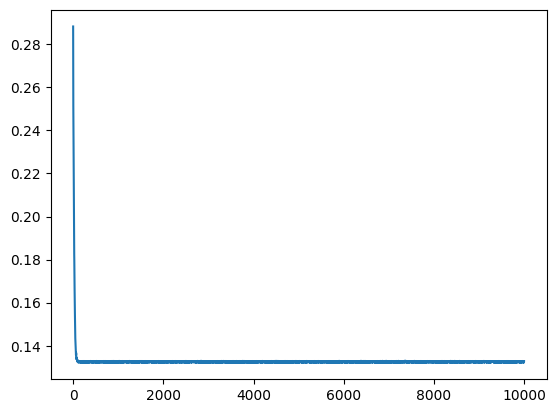

Input =  tensor([1., 0.])
Output =  tensor([0.4958], grad_fn=<ViewBackward0>)
Input =  tensor([0., 0.])
Output =  tensor([0.4958], grad_fn=<ViewBackward0>)


In [67]:
loss_list = []
torch.manual_seed(42)
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x


class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]


dataset = MyDataset(X, Y)
batch_size = 1
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)
print(model)


def train_one_epoch(idx):
    totalloss = 0.0
    for i, data in enumerate(data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        y_p = model(inputs)
        loss = loss_fn(y_p.flatten(), labels)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss / (len(data_loader) * batch_size)


loss_list = []
for epoch in range(10000):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch % 1000 == 0:
        print('epoch: {}, loss: {}'.format(epoch, avg_loss))
plt.plot(loss_list)
plt.show()
input = torch.tensor([1., 0.])
model.eval()
print("Input = ", input)
print("Output = ", model(input))

input = torch.tensor([0., 0.])
model.eval()
print("Input = ", input)
print("Output = ", model(input))

3. Manually verify the output values by taking system generated values of weights and biases 
for both Linear1 and Linear2 layers for Qn 1 and apply the transformations to input X and 
implement the same.

In [68]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class VerifyQ1:
    def __init__(self):
        self.w1 = np.array([[-1.9667,2.0750],[-3.0809, 3.3435]])
        self.b1 = np.array([0.7012, -2.5002])
        self.w2 = np.array([[-2.6653,  2.7713]])
        self.b2 = np.array([1.5715])
    def forward(self,x):
        temp = np.matmul(x, self.w1.T) + self.b1
        temp = sigmoid(temp)
        temp = np.matmul(temp, self.w2.T) + self.b2
        return temp

In [69]:
model = VerifyQ1()
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for i in inputs:
    i = i.reshape(1,-1)
    y = model.forward(i)
    print('Output Prediction for x1={}, x2={} is y={}'.format(i[0][0], i[0][0], round(y[0][0], 1)))

Output Prediction for x1=0, x2=0 is y=0.0
Output Prediction for x1=0, x2=0 is y=1.0
Output Prediction for x1=1, x2=1 is y=1.0
Output Prediction for x1=1, x2=1 is y=-0.0


4. Implement Feed Forward Neural Network with two hidden layers for classifying 
handwritten digits using MNIST dataset. Display the classification accuracy in the form 
of a Confusion matrix. Verify the number of learnable parameters in the model.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transform
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader

In [2]:
class MyClassifier(nn.Module):
    def __init__(self):
        super(MyClassifier, self).__init__()
        self.net = nn.Sequential(nn.Linear(784,100, bias=True),
                                 nn.ReLU(),
                                 nn.Linear(100,100,bias=True),
                                 nn.ReLU(),
                                 nn.Linear(100,10,bias=True))
    def forward(self, x):
        x = x.view(-1, 784)
        return self.net(x)

In [3]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
train_loader = DataLoader(mnist_trainset,batch_size=50, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())
test_loader = DataLoader(mnist_testset, batch_size=50, shuffle=True)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

total_params = 0
for name, param in model.named_parameters():
    params = param.numel()
    total_params += params

In [5]:
for epoch in range(6):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i%100 == 99:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0
            
print(f"Finished Training. Final loss = {loss.item()}, Total params = {total_params}")

mat = [[0 for _ in range(10)] for _ in range(10)]
correct, total = 0,0
for i, vdata in enumerate(test_loader):
    tinputs,tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model(tinputs)
    
    _,predicted = torch.max(toutputs,1)
    total += tlabels.size(0)
    correct += (predicted==tlabels).sum()
    for i in range(len(predicted)):
        mat[predicted[i].item()][tlabels[i].item()] += 1
        
print(f"Correct = {correct}, Total = {total}")
for i in range(10):
    print(mat[i])  


[1,   100] loss: 2.295
[1,   200] loss: 2.265
[1,   300] loss: 2.218
[1,   400] loss: 2.138
[1,   500] loss: 1.987
[1,   600] loss: 1.762
[1,   700] loss: 1.464
[1,   800] loss: 1.179
[1,   900] loss: 0.964
[1,  1000] loss: 0.831
[1,  1100] loss: 0.740
[1,  1200] loss: 0.662
[2,   100] loss: 0.622
[2,   200] loss: 0.563
[2,   300] loss: 0.545
[2,   400] loss: 0.527
[2,   500] loss: 0.497
[2,   600] loss: 0.489
[2,   700] loss: 0.450
[2,   800] loss: 0.455
[2,   900] loss: 0.421
[2,  1000] loss: 0.414
[2,  1100] loss: 0.402
[2,  1200] loss: 0.412
[3,   100] loss: 0.387
[3,   200] loss: 0.415
[3,   300] loss: 0.360
[3,   400] loss: 0.356
[3,   500] loss: 0.376
[3,   600] loss: 0.369
[3,   700] loss: 0.384
[3,   800] loss: 0.373
[3,   900] loss: 0.346
[3,  1000] loss: 0.348
[3,  1100] loss: 0.329
[3,  1200] loss: 0.349
[4,   100] loss: 0.342
[4,   200] loss: 0.331
[4,   300] loss: 0.340
[4,   400] loss: 0.327
[4,   500] loss: 0.328
[4,   600] loss: 0.307
[4,   700] loss: 0.309
[4,   800] 

In [6]:
for i in range(10):
    print(mat[i]) 

[960, 0, 11, 2, 1, 10, 12, 3, 11, 12]
[0, 1111, 4, 1, 2, 3, 3, 7, 7, 7]
[4, 3, 952, 21, 4, 6, 4, 25, 9, 1]
[1, 2, 12, 935, 0, 33, 1, 6, 26, 9]
[0, 0, 7, 0, 908, 6, 9, 6, 11, 23]
[3, 1, 0, 18, 0, 783, 6, 0, 21, 5]
[10, 4, 14, 3, 14, 19, 921, 0, 17, 0]
[1, 2, 10, 13, 2, 6, 1, 956, 14, 13]
[1, 12, 17, 11, 3, 16, 1, 2, 838, 3]
[0, 0, 5, 6, 48, 10, 0, 23, 20, 936]
